<a href="https://colab.research.google.com/github/FaizaAli-DS/Spam_SMS_Detection_CodSoft-_T2/blob/all-about-AI-and-Data-Science/Spam_SMS_Detection_CodSoft__T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


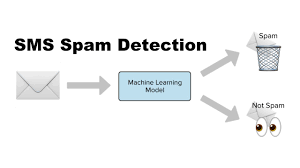
* Author: Faiza Ali<br>
* How to contact: https://www.linkedin.com/in/faizaali-ds/ <br>
* This project is part of my Internship Task


# Lets get start!
👉👉👉<br>
> Importing the necessary libraries.<br>


In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

Read the dats set i placed on google drive

In [6]:
train_data = pd.read_csv("/content/drive/MyDrive/CodSoft Datasets/spam.csv", encoding='ISO-8859-1')

In [7]:
train_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Drop all the unwanted colums

In [8]:
#we will drop the unwanted columns
drop_column = {'Unnamed: 2','Unnamed: 3','Unnamed: 4'}
train_data.drop(columns = drop_column,axis=1,inplace=True)

## Lets rename the columns properly

In [9]:
names = {"v1":"Email_Type","v2":"Email_content"}
train_data.rename(columns = names,inplace=True)

In [10]:
train_data.head()

,Email_Type,Email_content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
train_data.info() #2 clumns and 5572 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Email_Type     5572 non-null   object
 1   Email_content  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
train_data.describe()

,Email_Type,Email_content
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


## Now we will continue data Preprocessing

In [13]:
# Befor any training first check the null values
train_data.isnull().sum()

Email_Type       0
Email_content    0
dtype: int64

In [14]:
# Some time dataset conatin NAN value , so need to check these values
train_data.isna().sum()

Email_Type       0
Email_content    0
dtype: int64

In [15]:
#remove the dublicate vale
train_data.duplicated().sum()

403

In [16]:
#ohhhh , we have 403 dublicate vales , Dont worry, lets fix the error to clean the dataset
train_data.drop_duplicates(inplace=True)

## Here are the preprocessed dataset details

In [17]:
#lets describe the datset again
train_data.describe()

,Email_Type,Email_content
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


## **Lets do some Data Visualization**

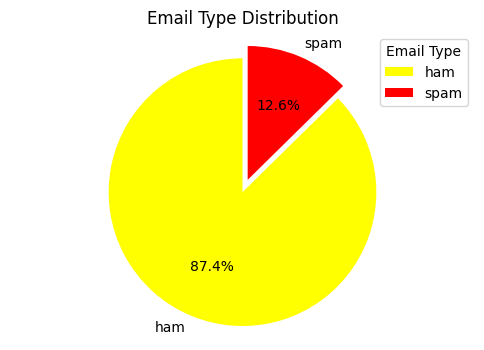

In [18]:
email_type_counts = train_data['Email_Type'].value_counts()
colors = ['yellow', 'red']
explode = (0, 0.1)
plt.figure(figsize=(6, 4))  # Adjust the figure size
plt.pie(email_type_counts, labels=['ham', 'spam'], autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title('Email Type Distribution')
plt.legend(title='Email Type', loc='upper right', labels=['ham', 'spam'])
plt.axis('equal')
plt.show()

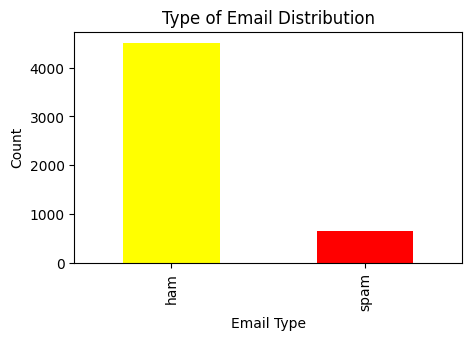

In [19]:
train_data['Email_Type'] = train_data['Email_Type'].apply(lambda x: x.lower())
train_data['Email_Type'].value_counts().plot(kind='bar', color=['yellow', 'red'], figsize=(5, 3))
plt.title('Type of Email Distribution')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()

In [20]:
train_data.Email_Type = [0 if value=="ham" else 1 for value in train_data.Email_Type]

In [21]:
train_data.head()

,Email_Type,Email_content
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Lets!, Split the Data for the training and testing

In [22]:
X = train_data['Email_content']
y = train_data['Email_Type']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=3)

## Its time to perform TF-IDF vectorizer for feature extraction

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
# TfidfVectorizer is a powerful tool for converting a collection of raw text documents into a matrix of TF-IDF
 #(Term Frequency-Inverse Document Frequency) features

tfidf_vectorizer = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True, max_features=5000, max_df=0.8)
X_train_matrix = tfidf_vectorizer.fit_transform(X_train)
X_test_matrix = tfidf_vectorizer.transform(X_test)

## Lets convert parse matrix to a dense array
To facilitate compatibility with machine learning algorithms that require dense arrays, such as scikit-learn classifiers, we convert sparse TF-IDF matrices to dense arrays.

In [26]:
X_train_matrix = X_train_matrix.toarray()
X_test_matrix = X_test_matrix.toarray()

# Building model to train the dataset

🙌 Hurrayy, all done, now we will build a Model to train the dataset

## I am using Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_matrix ,y_train)
y_pred = gnb.predict(X_test_matrix)

***Evaluating Model Accuracy using scikit-learn's accuracy_score***

In [29]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy Score of Naive Bayes Model : ",accuracy*100)

Accuracy Score of Naive Bayes Model :  86.65377176015474
